# Problem Statement

Airbnb Inc is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. Airbnb has close to 150 million customers across the world. Price is the most important factor considered by the customer while making booking into a property. Strategic pricing of the properties is important to avoid losing customers to the competitors.  
  
We have a data of 74111 Airbnb properties across the nations. Based on this data build a simple and multiple linear regression model to predict the strategic pricing of a new listed property on Airbnb.


In [162]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

### Importing data

In [163]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("AirBNB.csv")  

c:\users\karuna\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### EDA

In [164]:
# Check top few records to get a feel of the data structure
df.head(2)

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899


In [165]:
# drop the id column as it is useless for the model
df = df.drop('id', axis=1)

In [166]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
room_type               74106 non-null object
accommodates            74108 non-null float64
bathrooms               73908 non-null float64
cancellation_policy     74103 non-null object
cleaning_fee            74107 non-null object
instant_bookable        74111 non-null object
review_scores_rating    57389 non-null float64
bedrooms                74019 non-null float64
beds                    73980 non-null float64
log_price               74111 non-null float64
dtypes: float64(6), object(4)
memory usage: 4.5+ MB


In [127]:
df.describe(include="all")

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
count,74106,74108.000000,73908.000000,74103,74107,74111,57389.000000,74019.000000,73980.000000,74111.000000
unique,3,NaN,NaN,3,2,2,NaN,NaN,NaN,NaN
top,Entire home/apt,NaN,NaN,strict,True,f,NaN,NaN,NaN,NaN
freq,41308,NaN,NaN,32500,54399,54660,NaN,NaN,NaN,NaN
mean,NaN,3.155125,1.235272,NaN,NaN,NaN,94.067365,1.265797,1.710868,4.782069
std,NaN,2.153603,0.582054,NaN,NaN,NaN,7.836556,0.852149,1.254142,0.717394
min,NaN,1.000000,0.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000
25%,NaN,2.000000,1.000000,NaN,NaN,NaN,92.000000,1.000000,1.000000,4.317488
50%,NaN,2.000000,1.000000,NaN,NaN,NaN,96.000000,1.000000,1.000000,4.709530
75%,NaN,4.000000,1.000000,NaN,NaN,NaN,100.000000,1.000000,2.000000,5.220356


### unique values for categorical variables

In [86]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

ROOM_TYPE :  3
Shared room         2163
Private room       30635
Entire home/apt    41308
Name: room_type, dtype: int64


CANCELLATION_POLICY :  3
moderate    19060
flexible    22543
strict      32500
Name: cancellation_policy, dtype: int64


CLEANING_FEE :  2
False    19708
True     54399
Name: cleaning_fee, dtype: int64


INSTANT_BOOKABLE :  2
t    19451
f    54660
Name: instant_bookable, dtype: int64




### Converting Instant_bookable from 'f' and 't' to boolean

In [168]:
df.instant_bookable.replace(['f','t'],[False,True],inplace=True )

### Converting categorical to dummy variables

In [169]:
df = pd.get_dummies(df, columns=['room_type','cancellation_policy','cleaning_fee'],drop_first=True)

In [130]:
df.head(2)

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
0,3.0,1.0,False,100.0,1.0,1.0,5.010635,0,0,0,1,1
1,7.0,1.0,True,93.0,3.0,3.0,5.129899,0,0,0,1,1


In [170]:
# Are there any missing values ?
df.isnull().sum()

accommodates                        3
bathrooms                         203
instant_bookable                    0
review_scores_rating            16722
bedrooms                           92
beds                              131
log_price                           0
room_type_Private room              0
room_type_Shared room               0
cancellation_policy_moderate        0
cancellation_policy_strict          0
cleaning_fee_True                   0
dtype: int64

### Imputing missing values

In [171]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum()        

accommodates                    0
bathrooms                       0
instant_bookable                0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
cleaning_fee_True               0
dtype: int64

In [133]:
df.head()

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
0,3.0,1.0,False,100.000000,1.0,1.0,5.010635,0,0,0,1,1
1,7.0,1.0,True,93.000000,3.0,3.0,5.129899,0,0,0,1,1
2,5.0,1.0,True,92.000000,1.0,3.0,4.976734,0,0,1,0,1
3,4.0,1.0,False,94.067365,2.0,2.0,6.620073,0,0,0,0,1
4,2.0,1.0,True,40.000000,0.0,1.0,4.744932,0,0,1,0,1


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 12 columns):
accommodates                    74111 non-null float64
bathrooms                       74111 non-null float64
instant_bookable                74111 non-null bool
review_scores_rating            74111 non-null float64
bedrooms                        74111 non-null float64
beds                            74111 non-null float64
log_price                       74111 non-null float64
room_type_Private room          74111 non-null uint8
room_type_Shared room           74111 non-null uint8
cancellation_policy_moderate    74111 non-null uint8
cancellation_policy_strict      74111 non-null uint8
cleaning_fee_True               74111 non-null uint8
dtypes: bool(1), float64(6), uint8(5)
memory usage: 3.8 MB


In [38]:
df.describe()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
count,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000
mean,3.155125,1.235272,94.067365,1.265797,1.710868,4.782069,0.413366,0.029186,0.257182,0.438531,0.734021
std,2.153559,0.581256,6.896002,0.851620,1.253033,0.717394,0.492441,0.168329,0.437083,0.496211,0.441856
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,93.000000,1.000000,1.000000,4.317488,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,94.067365,1.000000,1.000000,4.709530,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,1.000000,99.000000,1.000000,2.000000,5.220356,1.000000,0.000000,1.000000,1.000000,1.000000
max,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking for duplicates

In [173]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 19998


In [174]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (74111, 12)
After (54113, 12)


In [175]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### Correlation Plot

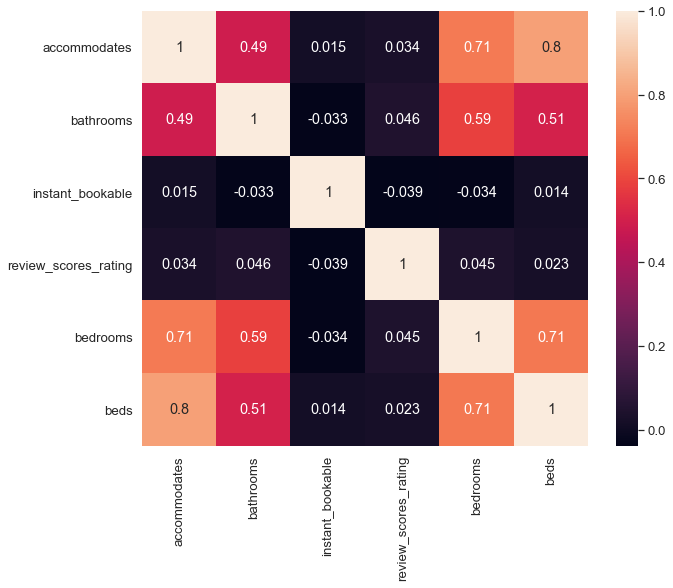

In [139]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df.iloc[:, 0:6].corr(),annot=True)
plt.show()

**The variable 'Accommodates', 'bedrooms','bathrooms', 'beds' are having correlation with each other.**


In [43]:
df.head()

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
0,3.0,1.0,False,100.000000,1.0,1.0,5.010635,0,0,0,1,1
1,7.0,1.0,True,93.000000,3.0,3.0,5.129899,0,0,0,1,1
2,5.0,1.0,True,92.000000,1.0,3.0,4.976734,0,0,1,0,1
3,4.0,1.0,False,94.067365,2.0,2.0,6.620073,0,0,0,0,1
4,2.0,1.0,True,40.000000,0.0,1.0,4.744932,0,0,1,0,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54113 entries, 0 to 74110
Data columns (total 12 columns):
accommodates                    54113 non-null float64
bathrooms                       54113 non-null float64
instant_bookable                54113 non-null bool
review_scores_rating            54113 non-null float64
bedrooms                        54113 non-null float64
beds                            54113 non-null float64
log_price                       54113 non-null float64
room_type_Private room          54113 non-null uint8
room_type_Shared room           54113 non-null uint8
cancellation_policy_moderate    54113 non-null uint8
cancellation_policy_strict      54113 non-null uint8
cleaning_fee_True               54113 non-null uint8
dtypes: bool(1), float64(6), uint8(5)
memory usage: 3.2 MB


### Outlier Checks

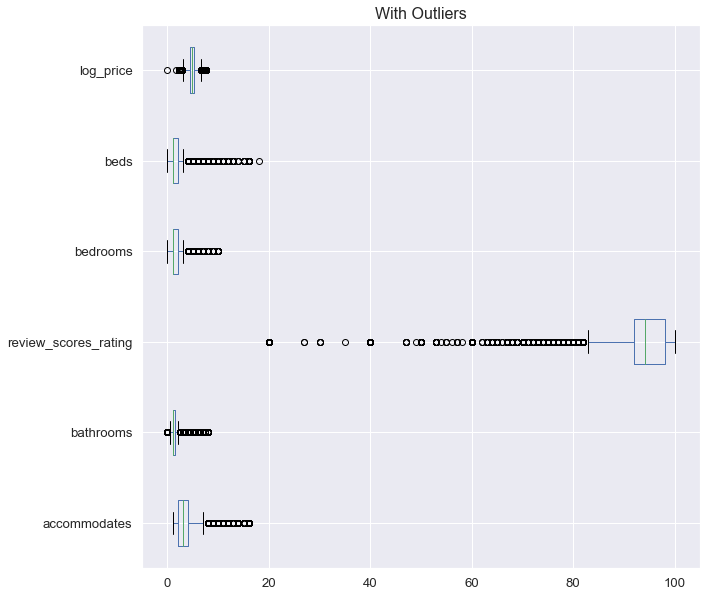

In [140]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [176]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [177]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

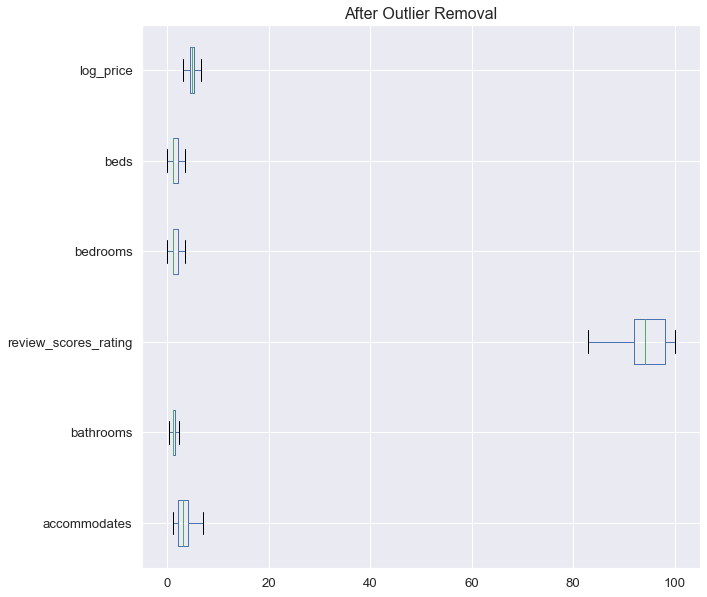

In [178]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

### Data Distribution

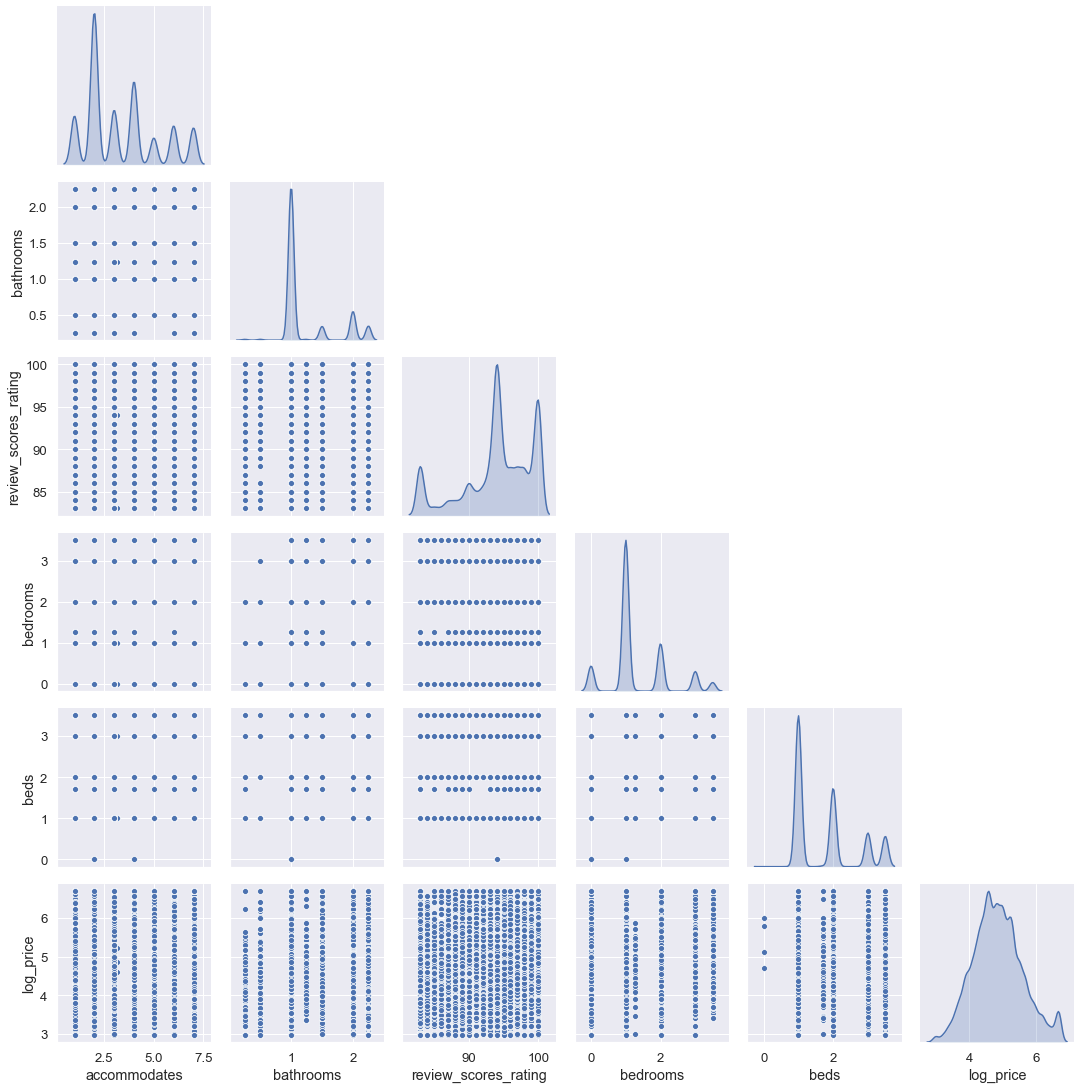

In [49]:
df_attr = (df[cont])
sns.pairplot(df_attr, diag_kind='kde',corner=True)  
plt.show()

### Train-Test Split

In [179]:
# Copy all the predictor variables into X dataframe
X = df.drop('log_price', axis=1)

# Copy target into the y dataframe. 
y = df[['log_price']]

In [180]:
X.head()

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
0,3.0,1.0,False,100.000000,1.0,1.0,0,0,0,1,1
1,7.0,1.0,True,93.000000,3.0,3.0,0,0,0,1,1
2,5.0,1.0,True,92.000000,1.0,3.0,0,0,1,0,1
3,4.0,1.0,False,94.067365,2.0,2.0,0,0,0,0,1
4,2.0,1.0,True,83.000000,0.0,1.0,0,0,1,0,1


In [181]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

### Linear Regression Model

In [182]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [183]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for accommodates is 0.09505750537691508
The coefficient for bathrooms is 0.1808041686372237
The coefficient for instant_bookable is -0.06503896431474758
The coefficient for review_scores_rating is 0.011701869399644821
The coefficient for bedrooms is 0.15805881436414482
The coefficient for beds is -0.04507899480969979
The coefficient for room_type_Private room is -0.6115570888488867
The coefficient for room_type_Shared room is -1.0818048891941419
The coefficient for cancellation_policy_moderate is -0.06001522139640275
The coefficient for cancellation_policy_strict is -0.0058228706280879505
The coefficient for cleaning_fee_True is -0.08187381765071988


In [184]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3.4292638017756376


In [185]:
# R square on training data
regression_model.score(X_train, y_train)

0.5082917563299905

50% of the variation in the log_price is explained by the predictors in the model for train set

In [186]:
# R square on testing data
regression_model.score(X_test, y_test)

0.5019765734338832

In [187]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.5159255811569989

In [188]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.5197867614388489

### Linear Regression using statsmodels

In [189]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,log_price
50743,3.0,1.0,False,94.067365,2.0,2.0,0,0,0,0,1,5.010635
12586,5.0,2.0,False,92.000000,2.0,2.0,0,0,0,1,1,5.703782
4152,4.0,1.0,False,100.000000,2.0,2.0,0,0,0,1,0,5.857933
10059,2.0,1.5,True,94.067365,1.0,1.0,1,0,0,1,0,5.129899
38268,4.0,1.0,False,84.000000,1.0,2.0,0,0,0,1,1,4.564348


In [190]:
data_train.rename(columns = {"room_type_Entire home/apt": "room_type_entire_home", "room_type_Private room": "room_type_private_room", 
                     "room_type_Shared room": "room_type_shared_room"}, 
                      inplace = True) 

data_test.rename(columns = {"room_type_Entire home/apt": "room_type_entire_home", "room_type_Private room": "room_type_private_room", 
                     "room_type_Shared room": "room_type_shared_room"}, 
                      inplace = True) 

In [191]:
data_train.columns

Index(['accommodates', 'bathrooms', 'instant_bookable', 'review_scores_rating',
       'bedrooms', 'beds', 'room_type_private_room', 'room_type_shared_room',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cleaning_fee_True', 'log_price'],
      dtype='object')

In [192]:
expr= 'log_price ~ accommodates + bathrooms + instant_bookable+review_scores_rating +bedrooms + beds + room_type_private_room + room_type_shared_room  + cancellation_policy_moderate + cancellation_policy_strict + cleaning_fee_True'

In [193]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept                       3.429264
instant_bookable[T.True]       -0.065039
accommodates                    0.095058
bathrooms                       0.180804
review_scores_rating            0.011702
bedrooms                        0.158059
beds                           -0.045079
room_type_private_room         -0.611557
room_type_shared_room          -1.081805
cancellation_policy_moderate   -0.060015
cancellation_policy_strict     -0.005823
cleaning_fee_True              -0.081874
dtype: float64

In [194]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     3813.
Date:                Sun, 07 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:36:45   Log-Likelihood:                -30728.
No. Observations:               40584   AIC:                         6.148e+04
Df Residuals:                   40572   BIC:                         6.158e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0

In [195]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('log_price',axis=1))-data_train['log_price'])**2)
mse

0.2661792052921872

In [196]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

0.515925581156999

In [197]:
np.sqrt(lm1.mse_resid) #another way

0.5160018732951096

In [198]:
# Prediction on Test data
y_pred = lm1.predict(data_test)
y_pred.head()

22473    5.001288
9903     4.190987
26471    4.208190
14042    4.771700
13734    5.375879
dtype: float64

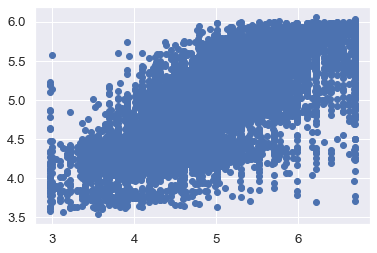

In [72]:
plt.scatter(y_test['log_price'], y_pred)
plt.show()

In [73]:
lm1.params

Intercept                       3.429264
instant_bookable[T.True]       -0.065039
accommodates                    0.095058
bathrooms                       0.180804
review_scores_rating            0.011702
bedrooms                        0.158059
beds                           -0.045079
room_type_private_room         -0.611557
room_type_shared_room          -1.081805
cancellation_policy_moderate   -0.060015
cancellation_policy_strict     -0.005823
cleaning_fee_True              -0.081874
dtype: float64

In [74]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(3.43) * Intercept + (-0.07) * instant_bookable[T.True] + (0.1) * accommodates + (0.18) * bathrooms + (0.01) * review_scores_rating + (0.16) * bedrooms + (-0.05) * beds + (-0.61) * room_type_private_room + (-1.08) * room_type_shared_room + (-0.06) * cancellation_policy_moderate + (-0.01) * cancellation_policy_strict + (-0.08) * cleaning_fee_True + 

 # Conclusion

The final Linear Regression equation is  
  
<b>log_price = b0 + b1 * instant_bookable[T.True] + b2 * accommodates + b3 * bathrooms + b4 * review_scores_rating + b5 * bedrooms + b6 * beds + b7 * room_type_private_room + b8 * room_type_shared_room + b9 * cancellation_policy_moderate + b10 * cancellation_policy_strict + b11 * cleaning_fee_True </b>
  
<b>log_price = (3.43) * Intercept + (-0.07) * instant_bookable[T.True] + (0.1) * accommodates + (0.18) * bathrooms + (0.01) * review_scores_rating + (0.16) * bedrooms + (-0.05) * beds + (-0.61) * room_type_private_room + (-1.08) * room_type_shared_room + (-0.06) * cancellation_policy_moderate + (-0.01) * cancellation_policy_strict + (-0.08) * cleaning_fee_True</b>  
  
When accommodates increases by 1 unit, log_price increases by 0.1 units, keeping all other predictors constant.  
similarly, when no. of bathrooms increases by 1 unit, log_price increases by 0.18 units, keeping all other predictors constant.
  
  
There are also some negative co-efficient values, for instance, room_type_shared_room has its corresponding co-efficient as -1.08. This implies, when the room type is shared room, the log_price decreases by 1.08 units, keeping all other predictors constant.

